In [39]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
import sys
import math
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
import sys
from random import seed
import pandas as pd
import cvxpy as cp
import random
import numpy.linalg as la
from sklearn.model_selection import train_test_split
np.random.seed(1)
seed(1)
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import torchvision.datasets as datasets
from torchvision import transforms
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

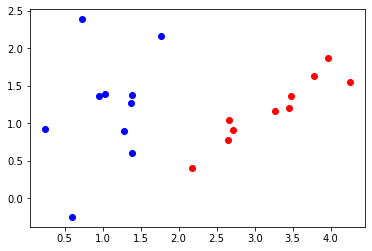

In [19]:
d = 2   
m = 10
n = 10  

x_center = [1,1]  
y_center = [3,1]
np.random.seed(8)  

orientation_x = np.random.rand(2,2)
orientation_y = np.random.rand(2,2)

rx = np.clip(np.random.randn(m,d),-2,2)
ry = np.clip(np.random.randn(n,d),-2,2)
x = x_center + np.dot(rx,orientation_x)
y = y_center + np.dot(ry,orientation_y)

plt.scatter(x[:,0],x[:,1],color='blue')
plt.scatter(y[:,0],y[:,1],color='red')


In [20]:
from sklearn.datasets import make_circles

In [399]:
#run this for linear separable dataset
X=np.append(x,y,axis=0)
Y=np.append(np.ones(n),np.ones(m)*-1,0)

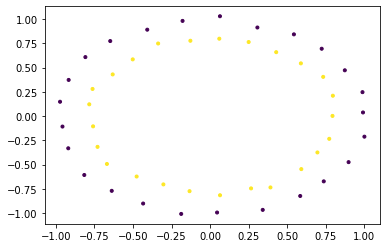

In [412]:
#run this for non linear dataset
X, Y = make_circles(n_samples = 50, noise = 0.02)
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.')
plt.show()

In [413]:
M=X.shape[0]
d=X.shape[1]

In [414]:
Y.shape

(50,)

In [415]:
kernel="rbf"

In [416]:
def gaussian(x,y,sigma=1):
  exponent = -np.sqrt(la.norm(x-y) ** 2 / (2 * sigma ** 2))
  return np.exp(exponent)
def polynomial(x,y,offset=5):
  d=x.shape[0]
  return (offset + np.dot(x, y)) ** d
def rbf(x,y,gamma=1):
  exponent = gamma*np.linalg.norm(x-y)**2
  return np.exp(-exponent)

In [417]:
def KernelMatrix(X,kernel="gaussian"):
  M=X.shape[0]
  K=np.zeros((M,M))
  for i in range(M):
    for j in range(M):
      if kernel=="gaussian":
        K[i][j]=gaussian(X[i],X[j],sigma=1)
      elif kernel=="rbf":
        K[i][j]=rbf(X[i],X[j])
      else:
        K[i][j]=polynomial(X[i],X[j])
  return K       

In [418]:
#dual solver for SVM with Kernel and no kernel
#pass kernel=True to use Kernel
def SVM_OPT_DUAL(X,Y,C=100000,kernel=False):
  M=X.shape[0]
  d=X.shape[1]
  alpha=cp.Variable((M,1))
  if kernel:
    K=KernelMatrix(X,kernel)
  else:
    K=np.dot(X,X.T)
  Yij=np.dot(Y.reshape(1,-1).T,Y.reshape(1,-1))
  #assert np.all(np.linalg.eigvals(K) > 0)
  Q=np.multiply(K,Yij)
  #assert np.all(np.linalg.eigvals(Q) > 0)
  obj=cp.Minimize(1/2* cp.quad_form(alpha,Q)-cp.sum(alpha))
  constraints=[]
  constraints+=[cp.sum(cp.multiply(alpha,Y.reshape(-1,1)))==0]
  for i in range(M):
    constraints+=[alpha[i]>=0]
    constraints+=[alpha[i]<=C]
  problem = cp.Problem(obj,constraints)
  problem.solve()
  return alpha.value

In [428]:
alpha=SVM_OPT_DUAL(X,Y,kernel=True)

In [429]:
alpha

array([[ 1.62332212e-07],
       [ 1.00000756e+05],
       [-5.01507847e-09],
       [-6.52972243e-07],
       [-7.08381564e-08],
       [ 1.00000756e+05],
       [ 1.00000756e+05],
       [-4.68995491e-08],
       [ 4.08418634e-07],
       [ 1.00000756e+05],
       [-2.11221736e-07],
       [ 1.00000756e+05],
       [ 1.00000756e+05],
       [ 2.87202105e-07],
       [ 2.05603906e-07],
       [-5.33575009e-07],
       [-5.16155698e-07],
       [ 2.65608388e-08],
       [-4.15778419e-07],
       [ 1.00000756e+05],
       [ 1.15421677e-07],
       [ 4.08476519e-07],
       [ 1.00000756e+05],
       [ 1.00000756e+05],
       [-3.99453010e-08],
       [-3.36117059e-07],
       [ 3.12789985e-07],
       [ 1.00000756e+05],
       [ 3.21181977e-07],
       [ 1.00000756e+05],
       [ 1.17773035e-07],
       [ 1.00000756e+05],
       [ 1.81646588e-07],
       [ 1.00000756e+05],
       [-7.56146880e-08],
       [-4.64763257e-07],
       [ 1.00000756e+05],
       [ 1.00000756e+05],
       [ 1.0

In [430]:
def findbKernel(X,Y,alpha,kernel="gaussian"):
  M=X.shape[0]
  b=0
  idx=np.argmax(alpha)
  x=X[idx]
  sum=0
  K=np.zeros(M)
  for i in range(M):
    if kernel=="gaussian":
      K[i]=gaussian(x,X[i],sigma=1)
    else:
      K[i]=polynomial(x,X[i])
    sum+=alpha[i]*Y[i]*K[i]
  b=Y[idx]-sum
  print(K)
  return b

In [431]:
b=findbKernel(X,Y,alpha,kernel)

[33.75867213 36.59918174 32.82804766 27.53910335 25.57159731 16.22798437
 16.25892466 18.06504569 19.09365225 15.93512511 25.69590482 26.00419196
 35.93465438 31.35394151 32.5080536  34.14739997 17.3274496  30.14087983
 19.97743281 18.72227598 21.86939448 23.4538824  17.8363163  34.92157471
 18.90872735 33.75157501 18.18481667 28.16952    20.3441383  28.116444
 17.69711156 23.4522631  29.57800981 20.94900791 21.30061023 23.62144554
 30.76305554 19.11790143 30.53544881 22.82250978 27.76456905 20.47537643
 35.7001291  16.0085587  17.11380077 32.73852973 33.23404874 25.06297194
 34.82496595 31.09633097]


In [432]:
b

array([1.2928214e-06])

In [433]:
def predictWithKernel(Xtest,X,Y,b,alpha,kernel="gaussian"):
  m=Xtest.shape[0]
  n=X.shape[0]
  K=np.zeros((m,n))
  Y_pred=np.zeros(m)
  for i in range(m):
    for j in range(n):
      if kernel=="gaussian":
        K[i][j]=gaussian(Xtest[i],X[j],sigma=1)
      else:
        K[i][j]=polynomial(Xtest[i],X[j])
  for i in range(m):
    sum=0
    for j in range(n):
      sum=sum+(K[i][j]*Y[j]*alpha[j])
    Y_pred[i]=np.sign(sum+b)
  return Y_pred

In [434]:
Ypred_kernel=predictWithKernel(X,X,Y,b,alpha,kernel)

In [435]:
accuracy_score(Y,Ypred_kernel)

0.52

In [436]:
from sklearn.svm import SVC
clf = SVC(C=1.0, kernel='linear')
classifier = clf.fit(X,Y)
classifier.score(X,Y)

0.5